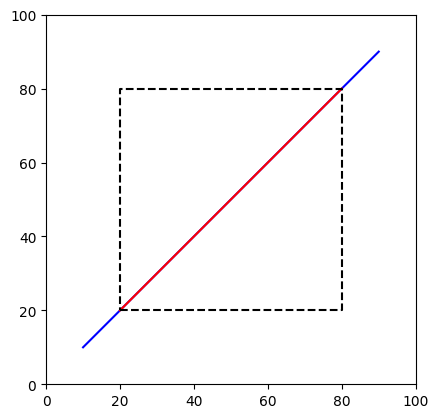

In [1]:
import matplotlib.pyplot as plt


def cohen_sutherland_line_clip(xmin, ymin, xmax, ymax, x1, y1, x2, y2):
    INSIDE = 0
    LEFT = 1
    RIGHT = 2
    BOTTOM = 4
    TOP = 8

    def compute_code(x, y):
        code = INSIDE
        if x < xmin:
            code |= LEFT
        elif x > xmax:
            code |= RIGHT
        if y < ymin:
            code |= BOTTOM
        elif y > ymax:
            code |= TOP
        return code

    code1 = compute_code(x1, y1)
    code2 = compute_code(x2, y2)

    while (code1 | code2) != 0:
        if (code1 & code2) != 0:
            return None  # Line completely outside

        x, y = 0, 0
        code_out = code1 if code1 != 0 else code2

        if code_out & TOP:
            x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
            y = ymax
        elif code_out & BOTTOM:
            x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
            y = ymin
        elif code_out & RIGHT:
            y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
            x = xmax
        elif code_out & LEFT:
            y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
            x = xmin

        if code_out == code1:
            x1, y1 = x, y
            code1 = compute_code(x1, y1)
        else:
            x2, y2 = x, y
            code2 = compute_code(x2, y2)

    return x1, y1, x2, y2


def plot_line(x1, y1, x2, y2, color='blue'):
    plt.plot([x1, x2], [y1, y2], color)

def plot_clipped_line(xmin, ymin, xmax, ymax, x1, y1, x2, y2):
    # Original line
    plot_line(x1, y1, x2, y2, color='blue')

    # Clipped line
    clipped_result = cohen_sutherland_line_clip(xmin, ymin, xmax, ymax, x1, y1, x2, y2)
    if clipped_result:
        x1_clipped, y1_clipped, x2_clipped, y2_clipped = clipped_result
        plot_line(x1_clipped, y1_clipped, x2_clipped, y2_clipped, color='red')

    # Clipping window
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')

    # Set axis limits and show the plot
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage:
xmin, ymin, xmax, ymax = 20, 20, 80, 80
x1, y1, x2, y2 = 10, 10, 90, 90

plot_clipped_line(xmin, ymin, xmax, ymax, x1, y1, x2, y2)
